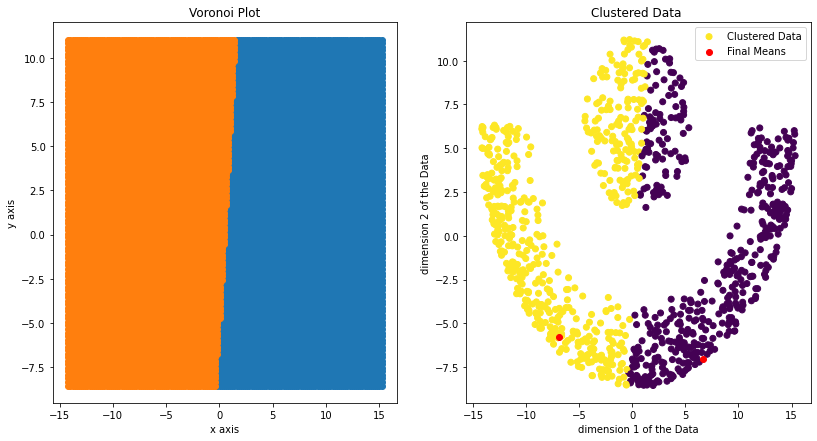

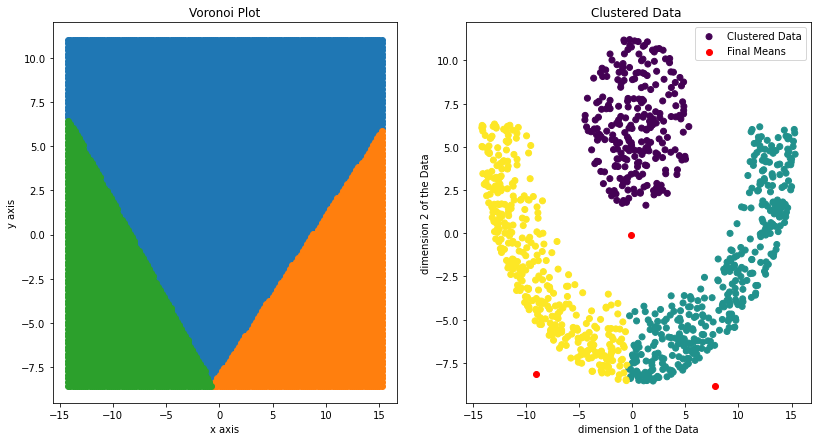

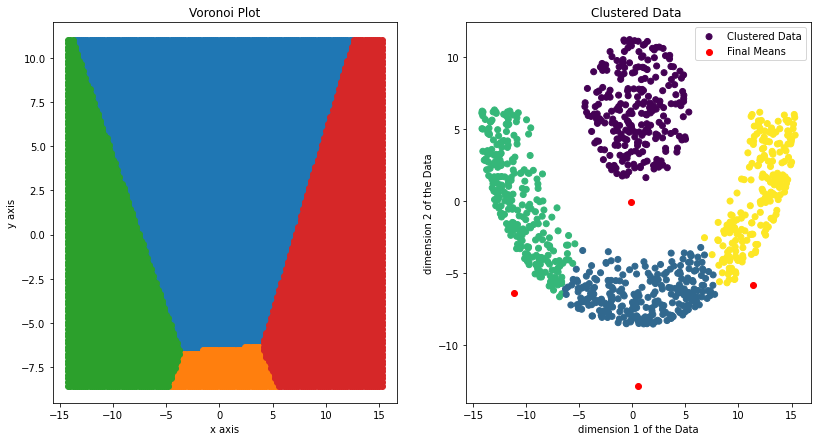

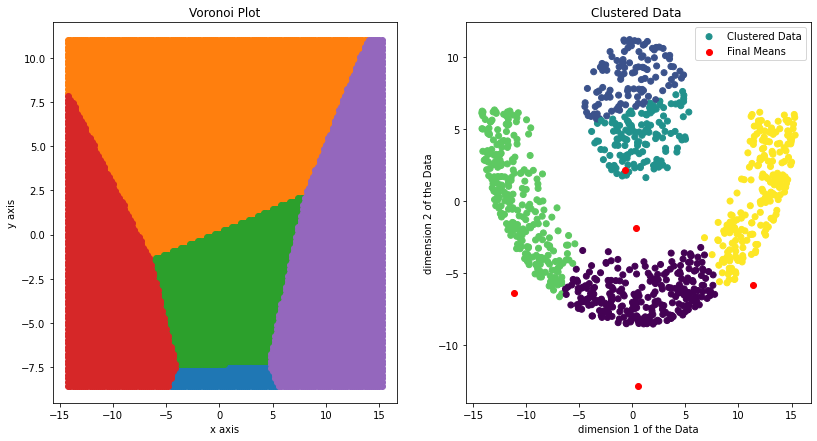

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d

X = np.genfromtxt("cm_dataset_2.csv",delimiter=',')
X = X.T 


def llyodsAlgorithm(X,K,muRandom=None,max_iter=1000):
     
    Size = X.shape[1]
    errorTotal = []
    ZReassigned = np.zeros(Size,dtype=np.uint8)
          
    
    muRandom = X[:,np.random.randint(0,X.shape[1],K)]  
    muList = muRandom.copy()

    iter=0
    while(True):

      
        error=0
        for i in range(Size):
            XCol=X[:,i]
            mucal=muList[:,ZReassigned[i]]
            errorCurrent = ((XCol-mucal)*(XCol-mucal)).sum()
            error += errorCurrent
      

        errorTotal.append(error)
         
        for i in range(Size):
             
            ZReassigned[i] = np.argmin(((X[:,i:i+1]-muList)**2).sum(axis=0))
 

        k=0
        for k in range(K):
             
            isZero=(ZReassigned==k).sum()
            if isZero!=0:
                sumRe=X*((ZReassigned==k).reshape(1,1000))
                muList[:,k] = sumRe.sum(axis=1)/isZero


        if iter>2:
            if abs(errorTotal[-1]-errorTotal[-2])<1:
                break
        iter+=1
    
    return muRandom,muList,ZReassigned,errorTotal


def displaySpace(mulist,X):
    plt.subplot(1,3,1)
    X=X.T
    x=np.arange(min(X[:,0]),max(X[:,0]),0.2)
    y=np.arange(min(X[:,1]),max(X[:,1]),0.2)
    points=np.array([[i,j] for i in x for j in y])
    mulist=np.array(mulist)
    mulist=np.transpose(mulist)
    mapping=np.zeros(len(points))

    for i,point in enumerate(points):
        near_cluster=-1
        min_dist=10e9
        for k in range(len(mulist)):
           
            dist=np.linalg.norm(mulist[k]-point)
            if(dist <min_dist):
                min_dist=dist
                near_cluster=k
        mapping[i]=near_cluster
    
    
    for i in range(len(mulist)):
        plt.scatter(points[mapping==i][:,0],points[mapping==i][:,1])
    plt.xlabel("x axis")
    plt.ylabel("y axis")
    plt.title("Voronoi Plot")
    plt.show()
    
    
    
def displayClustered(X,muRandom,muList,ZReassigned,history):
  
    plt.subplot(1,3,2)
    plt.xlabel("dimension 1 of the Data")
    plt.ylabel("dimension 2 of the Data")
    plt.scatter(X[0],X[1],c=ZReassigned)
    plt.scatter(muList[0],muList[1],color='r')
    
    plt.title("Clustered Data ")
    plt.legend(["Clustered Data","Final Means"])



def displayResults(X,muRandom,muList,ZReassigned,history):

    plt.figure(figsize=(21,7))

   
    displayClustered(X,muRandom,muList,ZReassigned,history)
    displaySpace(muList,X)

    plt.show()


xlim_data = (min(X[0]),max(X[0]))
ylim_data = (min(X[1]),max(X[1]))


 
K = 2

mu_random = X[:,np.random.randint(0,X.shape[1],5)] 
mu_i = mu_random[:,:K]
X_centered = X-X.mean(axis=1).reshape(-1,1)
 
muRandom,muList,ZReassigned,history = llyodsAlgorithm(X,K=K)
displayResults(X_centered,muRandom,muList,ZReassigned,history)

K = 3

mu_random = X[:,np.random.randint(0,X.shape[1],5)]
mu_i = mu_random[:,:K]
X_centered = X-X.mean(axis=1).reshape(-1,1)
 
muRandom,muList,ZReassigned,history = llyodsAlgorithm(X,K=K)
displayResults(X_centered,muRandom,muList,ZReassigned,history)


K = 4

mu_random = X[:,np.random.randint(0,X.shape[1],5)]
mu_i = mu_random[:,:K]
X_centered = X-X.mean(axis=1).reshape(-1,1)
 
muRandom,muList,ZReassigned,history = llyodsAlgorithm(X,K=K)
displayResults(X_centered,muRandom,muList,ZReassigned,history)


K = 5

mu_random = X[:,np.random.randint(0,X.shape[1],5)]
mu_i = mu_random[:,:K]
X_centered = X-X.mean(axis=1).reshape(-1,1)
 
muRandom,muList,ZReassigned,history = llyodsAlgorithm(X,K=K)
displayResults(X_centered,muRandom,muList,ZReassigned,history)

